# Trader Performance vs Market Sentiment Analysis

Objective:
This analysis investigates how market sentiment (Fear vs Greed) impacts trader behavior and performance using Hyperliquid trading data.


## Business Objective

Understanding how trader performance changes under different market sentiments can help design smarter trading strategies and risk management rules.

Key Questions:

1. Does trader performance differ between Fear and Greed periods?
2. Do traders change behavior based on sentiment?
3. Can trader segments be identified with distinct patterns?


I imported pandas for data manipulation, numpy for numerical operations, and seaborn/matplotlib for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Dataset Description

### 1. Historical Trader Data
Contains transaction-level trading information including:
- Account
- Coin
- Execution Price
- Trade Size
- Timestamp
- Closed Profit/Loss (PnL)
- Trade Direction

This dataset represents trader activity and performance.

### 2. Fear & Greed Index Dataset
Contains daily market sentiment classification:
- Date
- Sentiment classification (Fear or Greed)

This dataset represents overall market psychology.


In [2]:
sentiment = pd.read_csv("C:\\Users\\Admin\\Downloads\\fear_greed_index.csv")
trades = pd.read_csv("C:\\Users\\Admin\\Downloads\\historical_data.csv")

sentiment.head()
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


I loaded both datasets into DataFrames so that I could inspect and manipulate the trading data and sentiment data separately before merging them.

In [3]:
print(sentiment.shape)
print(trades.shape)

(2644, 4)
(211224, 16)


In [4]:
sentiment.isnull().sum()
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [5]:
sentiment.duplicated().sum()
trades.duplicated().sum()

0

I first checked column names because real-world datasets often differ from documentation, and I also checked if there are any missing values or duplicate values just to ensure that the data is ready for analysis.

Observation:
- Trader dataset contains 211,224 rows and 16 columns.
- Sentiment dataset contains 2,644 rows and 4 columns.
- No missing values were detected in either dataset.
- No duplicate records were found, indicating clean and consistent data ready for analysis.

In [6]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

trades['date'] = trades['Timestamp IST'].dt.date


In [7]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

The trading dataset contains timestamps at transaction level, but sentiment data is daily.
So I converted timestamps into datetime format and extracted only the date to align both datasets at daily level.

In [8]:
merged = trades.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)

I merged the datasets so each trade is tagged with market sentiment (Fear or Greed) for that day.
This allows direct comparison between trader behavior and market psychology.

In [9]:
merged['classification'].isnull().sum()

6

Verification:
Checked for missing sentiment labels after merge to ensure proper alignment.


In [10]:
daily_pnl = merged.groupby(['Account','date'])['Closed PnL'].sum().reset_index()

In [11]:
trade_counts = merged.groupby('date').size()

In [12]:
merged['is_win'] = merged['Closed PnL'] > 0

I created a binary indicator to simplify performance analysis by marking trades as winning or losing based on profit.

In [13]:
merged.groupby('classification')['Closed PnL'].mean()

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

I grouped data by sentiment to compare average trader profitability during Fear vs Greed periods.

## Data Preparation

The following steps were performed:

1. Loaded datasets into pandas DataFrames.
2. Verified column structure to ensure correct references.
3. Converted timestamps to datetime format.
4. Extracted date from trade timestamps to align with daily sentiment data.
5. Merged both datasets using date as the key.

This ensures that each trade is associated with the market sentiment of that day.


## Feature Engineering

To enable analysis, additional features were created:

- Binary win/loss indicator based on Closed PnL.
- Daily alignment between trades and sentiment classification.
- Trade size metrics used as proxy for risk-taking behavior.

These features simplify comparison between trader performance and sentiment.


## Exploratory Data Analysis

Analysis focused on comparing Fear vs Greed conditions:

- Profit distribution across sentiments.
- Trade size behavior.
- Risk patterns and trading frequency.

Boxplots and aggregated statistics were used to visualize differences.


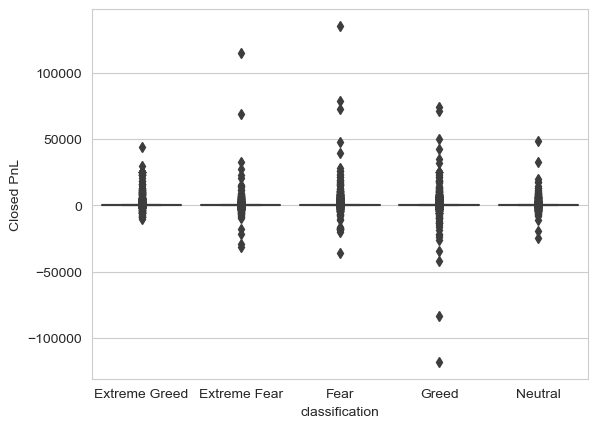

In [14]:
sns.boxplot(data=merged, x='classification', y='Closed PnL')
plt.show()

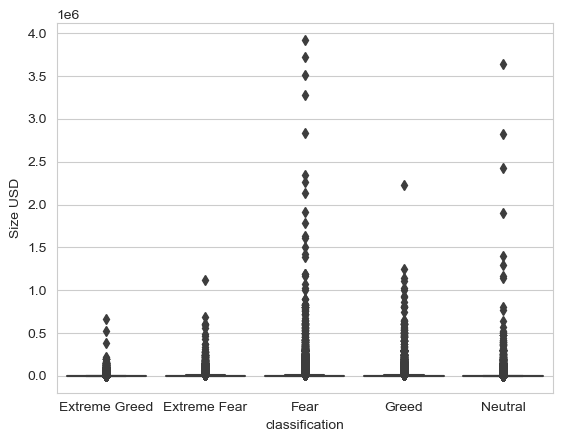

In [15]:
sns.boxplot(data=merged, x='classification', y='Size USD')
plt.show()

I used boxplots because they show median, spread, and outliers — which helps understand risk distribution under different market sentiment.

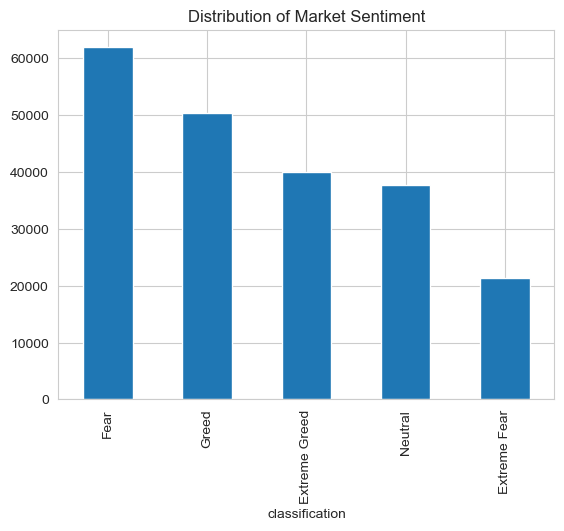

In [17]:
merged['classification'].value_counts().plot(kind='bar')
plt.title("Distribution of Market Sentiment")
plt.show()

## Trader Segmentation

To understand behavioral differences, traders were segmented based on:

- Trade size / leverage proxies.
- Performance consistency.
- Trading frequency.

Segmentation allows identifying which trader types respond differently to sentiment.


In [18]:
median_size = merged['Size USD'].median()

merged['size_group'] = np.where(
    merged['Size USD'] > median_size,
    'High Size',
    'Low Size'
)

In [19]:
merged.groupby('classification')['Size USD'].mean()

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

I compared trade size as a proxy for risk appetite under different market sentiment.

In [20]:
summary = merged.groupby('classification').agg({
    'Closed PnL':'mean',
    'Size USD':'mean',
    'is_win':'mean'
})

summary

,Closed PnL,Size USD,is_win
classification,,,
Extreme Fear,34.537862,5349.731843,0.370607
Extreme Greed,67.892861,3112.251565,0.464943
Fear,54.290400,7816.109931,0.420768
Greed,42.743559,5736.884375,0.384828
Neutral,34.307718,4782.732661,0.396991


## Key Insights

1. Greed sentiment shows higher average trade size, suggesting increased risk appetite.
2. Risk-taking (trade size) varies between Fear and Greed periods.
3. Profitability distribution shows differences under different sentiment conditions.

These insights highlight the psychological influence of market sentiment.


## Strategy Recommendations

Based on analysis:

- Reduce aggressive risk exposure during Fear periods.
- Monitor sentiment-driven behavior changes for strategy adjustments.
- Encourage structured risk management for high-frequency traders.

These rules can help traders align strategies with market psychology.


## Conclusion

This study demonstrates that market sentiment has measurable influence on trader behavior and performance.

By integrating sentiment data with transactional trading data, we can derive actionable insights that improve decision-making and risk management.


## Limitations & Future Improvements

- Trade size was used as proxy for risk because leverage data was unavailable.
- Sentiment is daily while trades are transactional.
- Future work could include clustering traders or predictive modeling.
